In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Advertising.txt')
data.drop('Unnamed: 0', axis = 1, inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
def scatter_plot(feature, target):
  plt.figure(figsize = (16,8))
  plt.scatter(data[feature], data[target], c = 'black')
  plt.xlabel("Money Spent on {} Ads".format(feature))
  plt.ylabel("{}".format(target))
  plt.show()

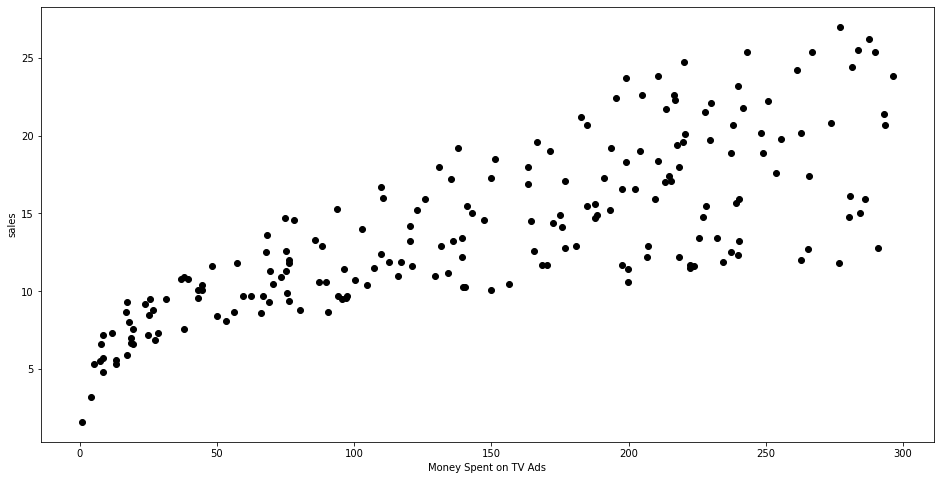

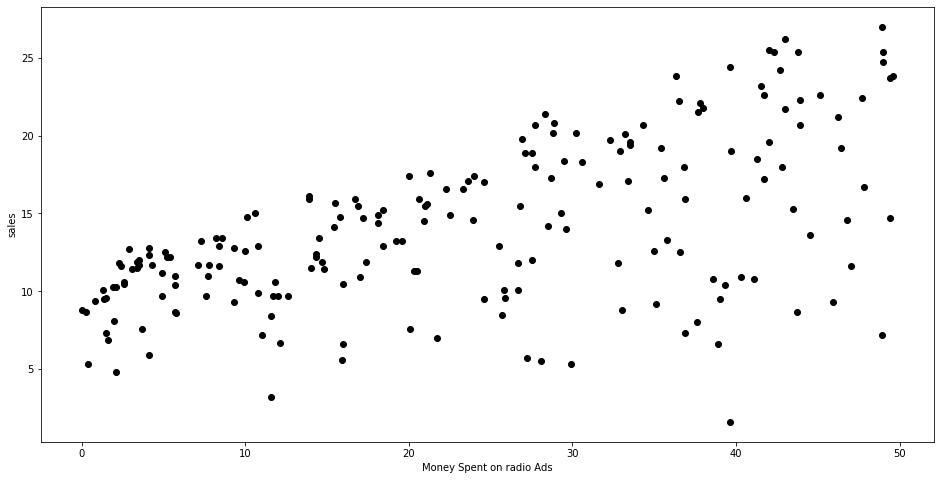

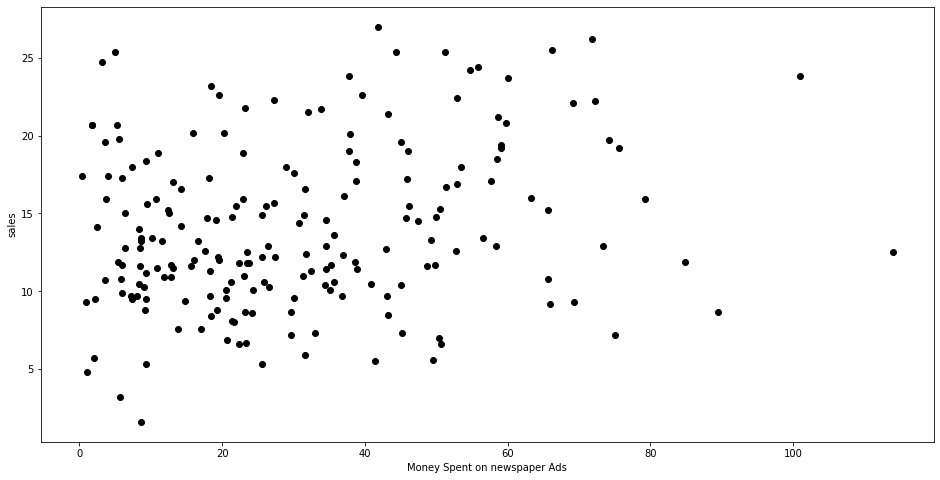

In [ ]:
scatter_plot('TV','sales')
scatter_plot('radio','sales')
scatter_plot('newspaper','sales')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
Xs = data.drop(['sales'],axis = 1)
y = data.drop(['TV', 'radio', 'newspaper'],axis =1)
lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring = 'neg_mean_squared_error', cv = 5)
mean_MSE = np.mean(MSEs)

mean_MSE

-3.0729465971002106

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
ridge_regressor.best_params_, ridge_regressor.best_score_

({'alpha': 20}, -3.072671338341143)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(Xs, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.96767794797427, tolerance: 0.43829494375000005
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238.46567830536372, tolerance: 0.45029244375
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.best_params_, lasso_regressor.best_score_

({'alpha': 1}, -3.041405896751369)